In [4]:
# Importação das bibliotecas a serem utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [ ]:
pip install --upgrade xlrd

In [5]:
# Leitura do nosso arquivo excel (Banco de dados)
file = '/content/Aula 7 - Dados_Desafio_Previsao_Vendas.xls'
df = pd.read_excel(file, parse_dates = True)

#df = pd.read_excel('/content/Aula 7 - Dados_Desafio_Previsao_Vendas.xlsx')
df

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,UNIDADE_MEDIDA_NF,PREÇO_NF,DATA_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
0,380,38797,254,30155,KGS,10.79500,2010-06-19 00:00:00,5.287059,12.8843,166091.966176
1,379,36022,963,13149,KGS,5.78000,2010-05-23 00:00:00,3.318824,6.0632,32362.009412
2,385,23397,1158,4602,KGS,11.30000,2010-03-08 00:00:00,7.872941,14.4001,15771.324706
3,422,15430,112,13850,KGS,3.92600,2010-04-26 00:00:00,3.911765,7.1500,197.158824
4,380,6319,69,5347,KGS,44.39000,2009-08-24 00:00:00,4.109412,10.0100,215380.305294
...,...,...,...,...,...,...,...,...,...,...
16685,318,23353,256,1753,KGS,245.83806,2010-06-03 00:00:00,50.268235,168.7686,342833.902709
16686,318,23353,256,2103,KGS,218.57511,2010-10-02 00:00:00,47.814118,175.1035,359110.366918
16687,318,23353,256,2103,KGS,233.59089,2010-09-03 00:00:00,55.752941,187.1584,373993.206376
16688,318,23353,256,1753,KGS,257.11803,2010-07-02 00:00:00,52.582353,176.5049,358551.041884


In [6]:
# Verificar se existe valores nulos no nosso banco de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16690 entries, 0 to 16689
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VENDEDOR           16690 non-null  int64  
 1   CLIENTE            16690 non-null  int64  
 2   PRODUTO            16690 non-null  int64  
 3   QUANTIDADE         16690 non-null  int64  
 4   UNIDADE_MEDIDA_NF  16690 non-null  object 
 5   PREÇO_NF           16690 non-null  float64
 6   DATA_NF            16690 non-null  object 
 7   CRP_AJUSTADO       16690 non-null  float64
 8   VLR_PRECO_LISTA    16683 non-null  float64
 9   VLR_CONTRIBUICAO   16690 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.3+ MB


In [7]:
# Verificar os tipos das variáveis

df.dtypes

VENDEDOR               int64
CLIENTE                int64
PRODUTO                int64
QUANTIDADE             int64
UNIDADE_MEDIDA_NF     object
PREÇO_NF             float64
DATA_NF               object
CRP_AJUSTADO         float64
VLR_PRECO_LISTA      float64
VLR_CONTRIBUICAO     float64
dtype: object

In [8]:
# Mostrar detalhes como a média, desvio, mínimo, porcentagem e o máximo

df.describe()

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,PREÇO_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
count,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16683.000000,16690.000000
mean,354.920132,21781.291072,353.885321,1498.689455,22.712701,8.808834,23.913970,8841.444155
std,42.349895,10531.812495,470.760665,3105.141894,69.610306,22.542751,77.443051,22624.107889
min,47.000000,13.000000,1.000000,0.000000,0.910000,0.584706,1.129700,-6871.449412
25%,324.000000,12748.000000,60.000000,219.000000,6.136000,2.552941,6.292000,1452.670721
50%,335.000000,23390.000000,121.000000,525.000000,9.867000,4.068235,9.538100,3048.211294
75%,389.000000,30531.000000,411.000000,1446.000000,17.810000,7.179118,18.968950,7559.073706
max,445.000000,39214.000000,1649.000000,53630.000000,1464.359000,669.092941,1784.954600,397882.403647


In [9]:
# Removendo colunas que não serão utilizadas em nossas análises

df1 = df.drop(['VENDEDOR', 'CLIENTE', 'CRP_AJUSTADO', 'UNIDADE_MEDIDA_NF'], axis=1, inplace = True)


In [10]:
# Fazendo o agrupamento por produto e a soma geral do nosso banco de dados
# Para visualizar a soma da Quantidade e Preço_NF 

n_by_product = df.groupby(["PRODUTO"]).sum()

n_by_product

,QUANTIDADE,PREÇO_NF,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
PRODUTO,,,,
1,87900,312.45253,218.2752,2.980310e+05
2,653698,3974.32581,3968.1785,2.830418e+06
3,623181,1926.80072,1839.2231,1.778279e+06
4,151794,3606.49744,3663.9317,7.402461e+05
6,157877,2174.28900,2314.7124,8.073150e+05
...,...,...,...,...
1605,8,240.65600,306.5634,1.097304e+03
1626,333,8.74900,10.1959,1.322852e+03
1641,504,2.10600,2.5025,6.505158e+02


In [11]:
# Mudando o tipo para float da coluna 'PRODUTO'

df['PRODUTO'] = df['PRODUTO'].astype(float)

In [12]:
print(df.groupby('QUANTIDADE')['PRODUTO'].count())

QUANTIDADE
0         1
1        19
3        10
5         6
7         2
         ..
34976     2
36641    19
36904     1
39972     7
53630     1
Name: PRODUTO, Length: 622, dtype: int64


In [13]:
#Ordenando produto com maior quantidade de vendas

df3 = df.sort_values(by='QUANTIDADE', ascending= False, inplace = True)

In [14]:
# Pegando pelo ID do vendedor que mais vendeu
df[df.index == 14938]

,PRODUTO,QUANTIDADE,PREÇO_NF,DATA_NF,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
14938,3.0,53630,3.276,2010-05-07 00:00:00,3.9468,77201.962353


In [15]:
# Selecionando apenas o produto '3'

df3 = df.loc[df['PRODUTO'] == 3]

In [16]:
# Corrigindo a data para ficar no formato de datatime

df['DATA_NF']= pd.to_datetime(df['DATA_NF'], format='%Y-%m-%d', errors='coerce')

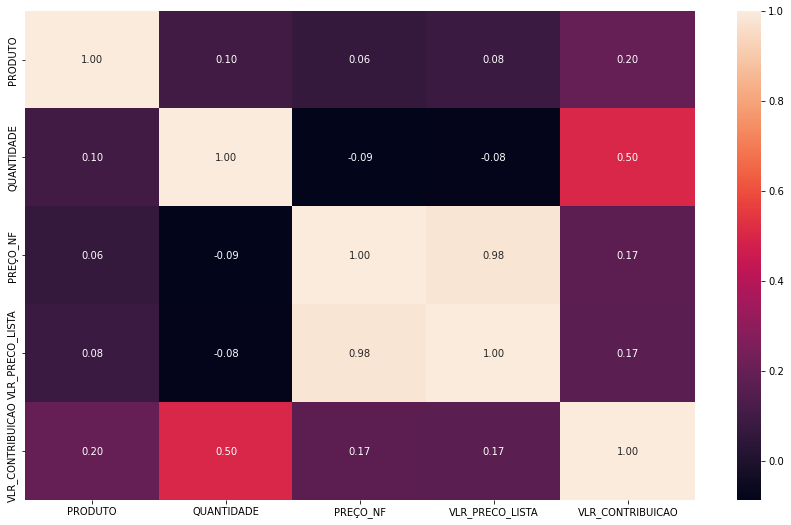

In [17]:
# Plotando o gráfico de calor com a correlação de pearson

plt.rcParams['figure.figsize'] = (15,9)
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f')

In [18]:
# Ajustando a data numa nova coluna para que fique em Mês e Ano

df['Mes'] = df['DATA_NF'].dt.strftime('%Y-%m')
df_mes = df.groupby(df['Mes'], as_index=False).sum()

df_mes.head()

,Mes,PRODUTO,QUANTIDADE,PREÇO_NF,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
0,2009-01,237701.0,1216925,12366.76896,13113.2573,5.705050e+06
1,2009-02,242655.0,966048,11566.61974,12086.5316,5.024627e+06
2,2009-03,252742.0,1027397,15017.05725,15665.0637,4.986500e+06
3,2009-04,294709.0,1129511,16857.99947,18144.4263,6.649561e+06
4,2009-05,308006.0,1232642,17448.44062,18187.7839,7.253326e+06


In [ ]:
# Outra forma de criar uma nova coluna 

# df_mes['mes'] = df['DATA_NF'].apply(lambda x: str(x)[5:7])
# df_mes.head()

In [19]:
# Criando duas colunas para fazer a nossa predição

series = df_mes[['Mes','QUANTIDADE']]



In [ ]:
series.set_index('Mes', drop=False)

In [22]:
series.dtypes

Mes           datetime64[ns]
QUANTIDADE             int64
dtype: object

In [20]:
# Normalizando a coluna Mes para ficar em Mês e Ano e transformando o tipo em Datetime

#series['Mes']= pd.to_datetime(series['Mes'], format='%Y-%m', errors='coerce')

#series.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mes           datetime64[ns]
QUANTIDADE             int64
dtype: object

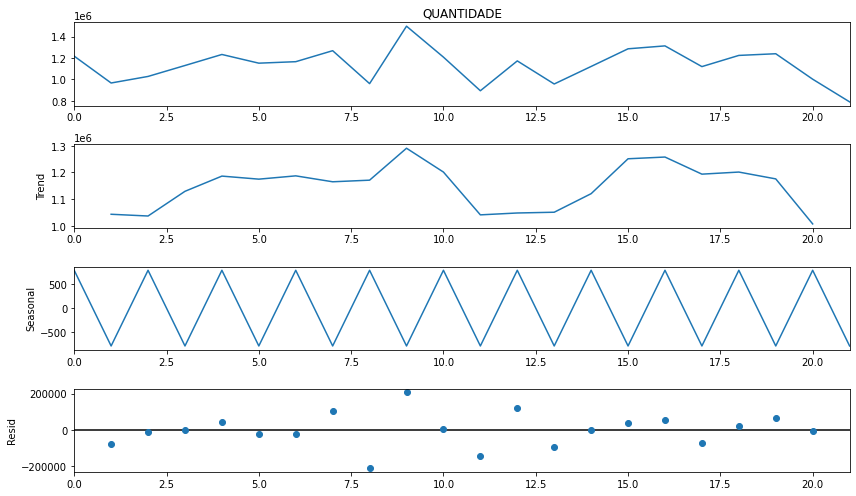

In [23]:
# Biblioteca para fazer a nossa decomposição

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df_mes['QUANTIDADE'], period=2)

# Plot decomposition
fig = decomp.plot();
fig.set_size_inches((12, 7))
plt.tight_layout();

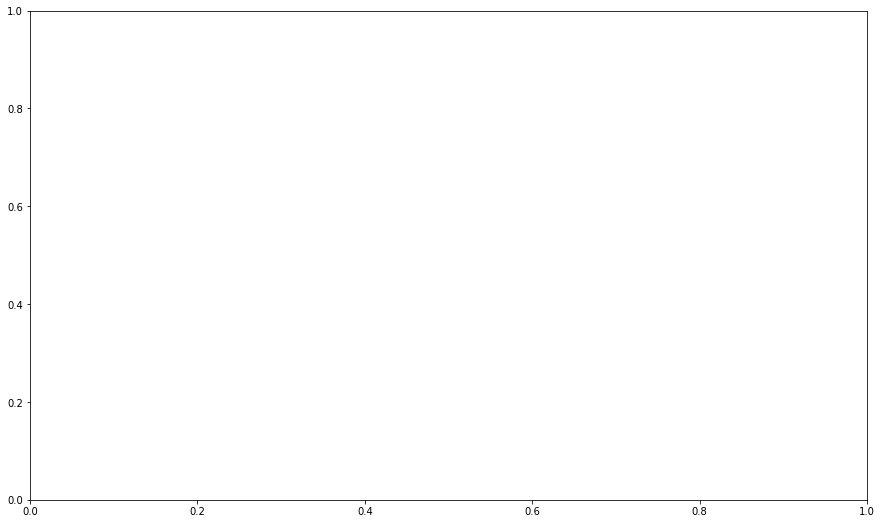

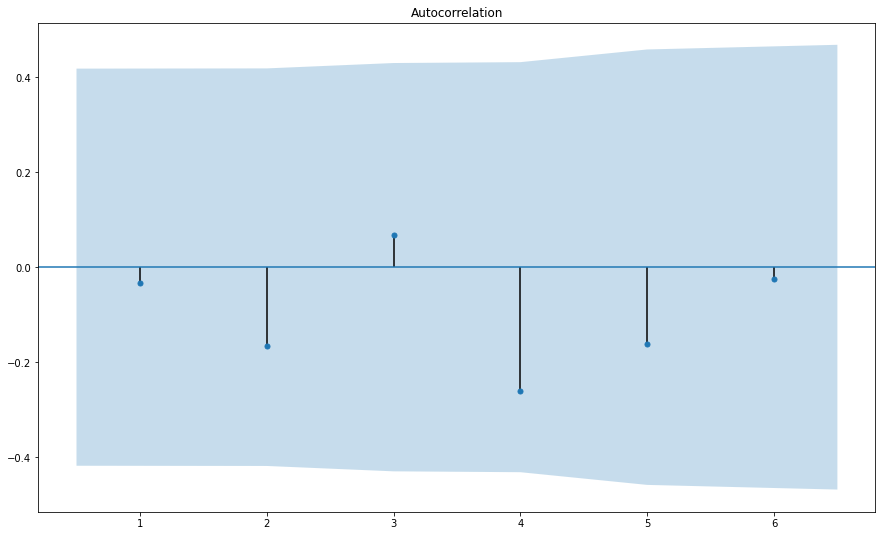

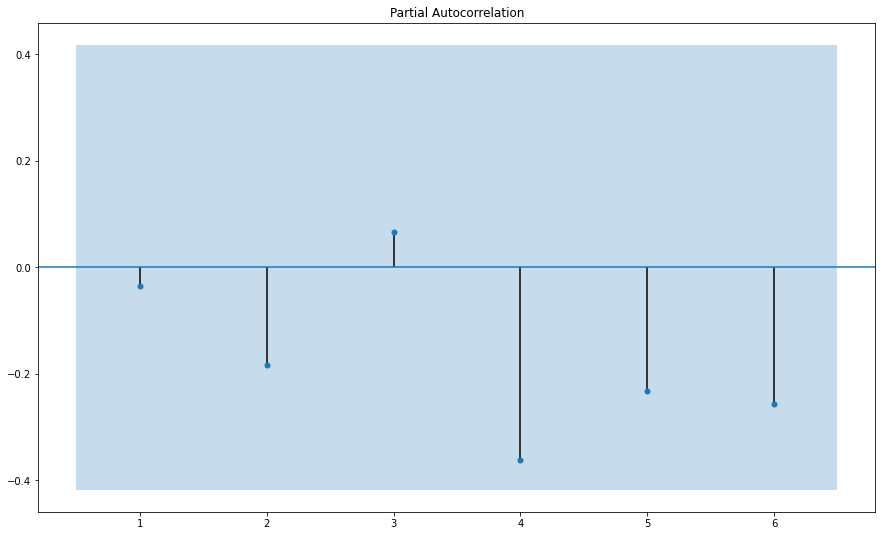

In [24]:
# Biblioteca para gerar os gráficos de autocorrelação e autocorrelação parcial

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(df_mes['QUANTIDADE'], lags=6, zero=False);
plot_pacf(df_mes['QUANTIDADE'], lags=6, zero=False);

In [25]:
# df = pd.get_dummies(df, columns=['DATA_NF'], drop_first= False)

In [26]:
series.head()

,Mes,QUANTIDADE
0,2009-01-01,1216925
1,2009-02-01,966048
2,2009-03-01,1027397
3,2009-04-01,1129511
4,2009-05-01,1232642


In [ ]:
series = pd.read_excel(file, parse_dates =['DATA_NF'],index_col=0, squeeze=True)

series['DATA_NF']= pd.to_datetime(series['DATA_NF'], format='%Y-%m', errors='coerce')

# Veja agora o recurso 'Month' é do tipo datetime
series.head()

In [ ]:
series.reset_index(drop=True, inplace = True)

In [ ]:
series1 = series.drop(['CLIENTE', 'QUANTIDADE', 'CRP_AJUSTADO', 'UNIDADE_MEDIDA_NF', 'PREÇO_NF', 'VLR_PRECO_LISTA', 'VLR_CONTRIBUICAO'], axis=1, inplace = True)


In [29]:
# series.apply(pd.to_numeric, downcast="integer", errors="ignore")


In [30]:
series.dtypes


Mes           datetime64[ns]
QUANTIDADE             int64
dtype: object

In [ ]:
series = series.set_index('DATA_NF')

In [31]:
series


,Mes,QUANTIDADE
0,2009-01-01,1216925
1,2009-02-01,966048
2,2009-03-01,1027397
3,2009-04-01,1129511
4,2009-05-01,1232642
5,2009-06-01,1151371
6,2009-07-01,1165243
7,2009-08-01,1267980
8,2009-09-01,960181
9,2009-10-01,1497071


In [32]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

#Aqui vamos criar três ajustes nos quais tomaremos três valores diferentes 
#de alpha (valores do nível de suavização): 0.2; 0.8 e valor otimizado 
#automaticamente pelo statsmodel que é o recomendado.

fit1 = SimpleExpSmoothing(series).fit(
    smoothing_level=0.2, optimized=False);
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$");

fit2 = SimpleExpSmoothing(series).fit(
    smoothing_level=0.8, optimized=False);

fcast2 = fit2.forecast(3).rename(r"$\alpha=0.8$");


fit3 = SimpleExpSmoothing(series).fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])



plt.plot(fit1.fittedvalues, marker="o", color="blue");
(line1,) = plt.plot(fcast1, marker="o", color="blue");
plt.plot(fit2.fittedvalues, marker="o", color="red");
(line2,) = plt.plot(fcast2, marker="o", color="red");

plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")

plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

ValueError: ignored

In [ ]:
print(np.asarray(series))